In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print("veri seti boyutu:",df_train.shape)

veri seti boyutu: (1460, 81)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


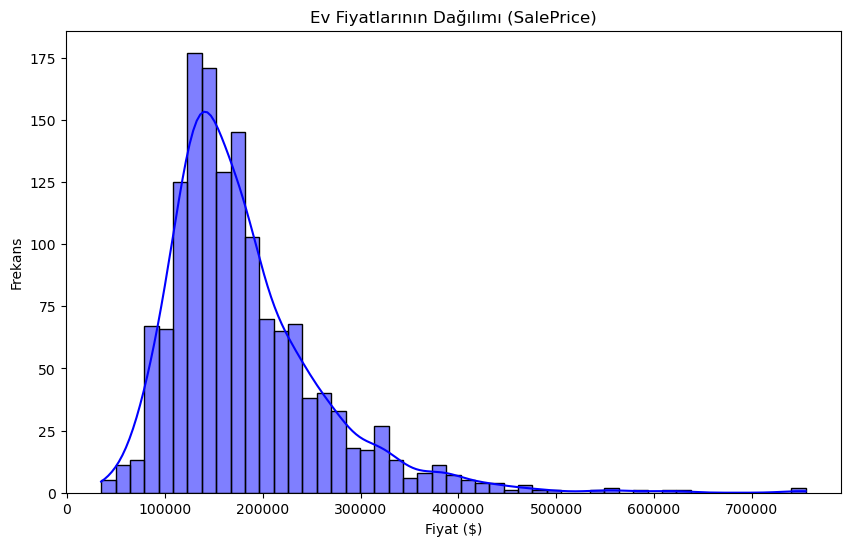

In [5]:
# Grafik boyutunu ayarlayalım
plt.figure(figsize=(10, 6))

# SalePrice dağılımını çizelim (Histogram + KDE)
sns.histplot(df_train['SalePrice'], kde=True, color='blue')

plt.title('Ev Fiyatlarının Dağılımı (SalePrice)')
plt.xlabel('Fiyat ($)')
plt.ylabel('Frekans')
plt.show()

In [6]:
print("Dönüşüm Öncesi Skewness:", df_train['SalePrice'].skew())
#"Normal Dağılım"a (Çan Eğrisi) benzetmek için en iyi seçeneğimiz Logaritma almaktır. Logaritma,
#büyük sayıları küçültüp birbirine yaklaştırır, böylece o uzun kuyruğu içeri çeker.

Dönüşüm Öncesi Skewness: 1.8828757597682129


In [7]:
df_train['SalePrice_Log'] = np.log1p(df_train['SalePrice'])

In [8]:
print("Dönüşüm sonrası Skewness:", df_train['SalePrice_Log'].skew())

Dönüşüm sonrası Skewness: 0.12134661989685333


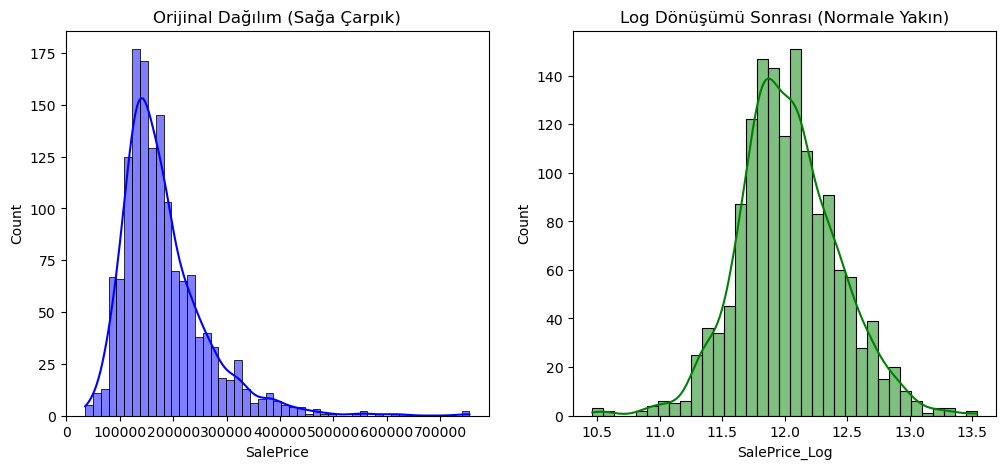

In [9]:
plt.figure(figsize=(12, 5))

# Sol taraf: Orijinal
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, color='blue')
plt.title('Orijinal Dağılım (Sağa Çarpık)')

# Sağ taraf: Log Dönüşümü Yapılmış
plt.subplot(1, 2, 2)
sns.histplot(df_train['SalePrice_Log'], kde=True, color='green')
plt.title('Log Dönüşümü Sonrası (Normale Yakın)')

plt.show()

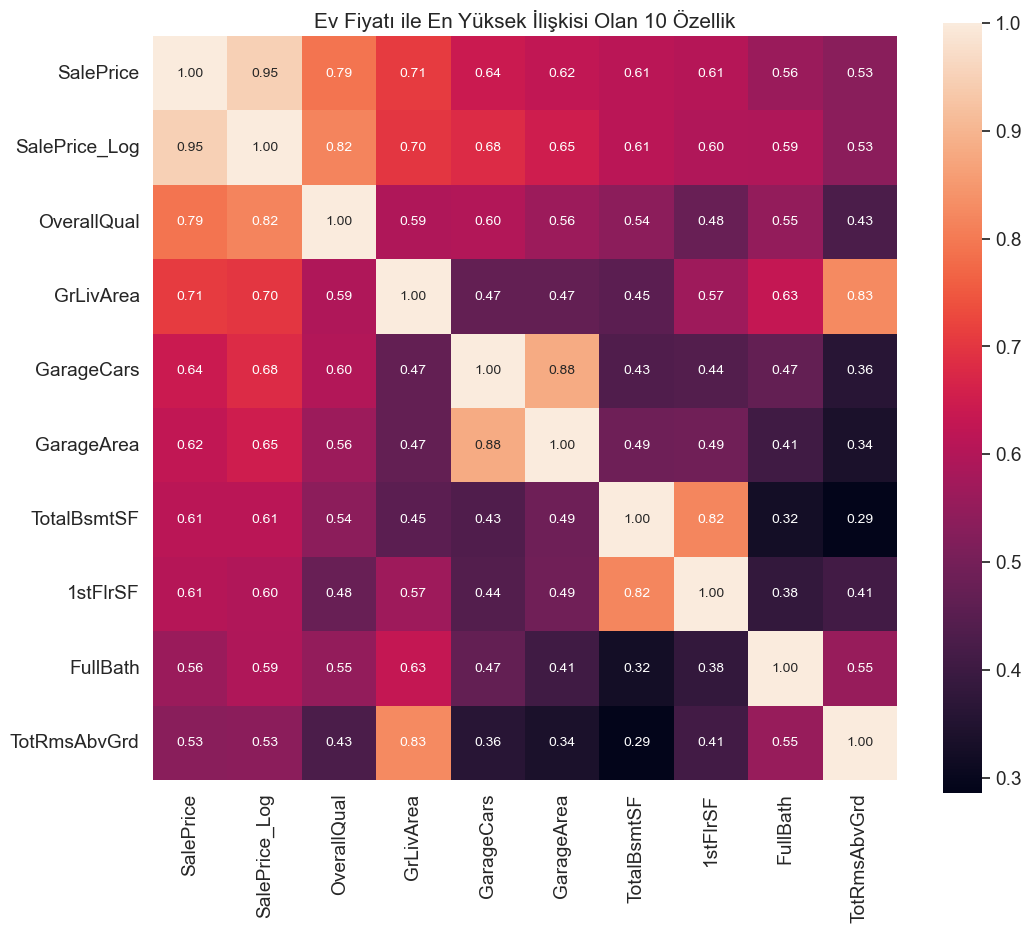

In [10]:
numeric_df = df_train.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
k = 10 
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.title('Ev Fiyatı ile En Yüksek İlişkisi Olan 10 Özellik')
plt.show()


In [11]:
# Hangi sütunda kaç tane boş veri var?
total = df_train.isnull().sum().sort_values(ascending=False)

# Yüzdesel olarak ne kadarı boş?
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)

# Tabloyu birleştirelim ki okuması kolay olsun
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam Eksik Sayısı', 'Eksiklik Oranı (%)'])

# En çok eksiği olan ilk 20 sütunu göster
missing_data.head(20)

,Toplam Eksik Sayısı,Eksiklik Oranı (%)
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
# 1. GRUP: Eksik olması "O özellik evde yok" anlamına gelenler
# Bu sütunlardaki NaN değerlerini "None" (Yok) kelimesiyle dolduruyoruz.
# (Pandas'ta fillna fonksiyonu boşlukları doldurur)

missing_meaning_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType' # Duvar kaplaması tipi
]

for col in missing_meaning_none:
    df_train[col] = df_train[col].fillna("None")

# 2. GRUP: Sayısal olup, özellik yoksa değeri 0 olması gerekenler
# (Örn: Garaj yoksa garajın yapım yılı veya alanı 0'dır)
missing_meaning_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

for col in missing_meaning_zero:
    df_train[col] = df_train[col].fillna(0)


# 3. GRUP: Gerçekten eksik olanlar (LotFrontage - Sokak Cephesi)
# Her evin sokak cephesi, kendi mahallesindeki diğer evlere benzerdir.
# Bu yüzden tüm setin ortalamasını almak yerine, "Mahalle bazlı medyan" ile dolduruyoruz.
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

# Ufak tefek kalan tekil eksikleri de (Elektrik sistemi vs.) en çok tekrar eden değerle (Mod) dolduralım
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

# SON KONTROL: Hala eksik kaldı mı?
print("Kalan toplam eksik sayısı:", df_train.isnull().sum().max())

Kalan toplam eksik sayısı: 0


In [13]:
# Kalite belirten sıralı değişkenleri seçiyoruz
qual_cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
             'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual']

# İstatistiksel Sıralama: Kötüden İyiye doğru puan veriyoruz (Label Encoding)
# Bu sayede model; "Puan arttıkça kalite artar" mantığını kurabilecek.
qual_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0
}

# Döngü ile tüm bu sütunları sayıya çeviriyoruz
for col in qual_cols:
    # map fonksiyonu sözlükteki karşılığını yazar
    df_train[col] = df_train[col].map(qual_map)

# Kontrol edelim: Artık "Ex, Gd" yerine sayılar görüyor muyuz?
df_train[qual_cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual
0,0,4,3,3,3,4,3,5,0,4
1,3,4,3,3,3,3,3,5,0,3
2,3,4,3,3,3,4,3,5,0,4
3,4,3,4,3,3,3,3,4,0,4
4,3,4,3,3,3,4,3,5,0,4


In [14]:
# 1. Gereksiz 'Id' sütununu atıyoruz 
if 'Id' in df_train.columns:
    df_train = df_train.drop(['Id'], axis=1)

# 2. One-Hot Encoding (Dummy Variables)
# pd.get_dummies fonksiyonu, kalan tüm "yazı" (object) tipindeki sütunları bulur 
# ve onları 0-1 sütunlarına çevirir.
df_encoded = pd.get_dummies(df_train, drop_first=True) #drop_first=True (n-1 Mantığı)

# 3. Bakalım veri setimizin boyutu ne oldu?
print("Eski boyut:",df_train.shape)
print("Yeni boyut:",df_encoded.shape)

# Yeni oluşan sütunlardan rastgele birkaçına bakalım
df_encoded.head()

Eski boyut: (1460, 81)
Yeni boyut: (1460, 231)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,208500,12.247699,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler# 1. X ve y'yi ayıralım
# Y bizim hedefimiz (Log alınmış fiyat)
y = df_encoded['SalePrice_Log']

# X, fiyat bilgileri hariç her şeydir (Orijinal SalePrice'ı da atmalıyız, yoksa kopya çeker!)
X = df_encoded.drop(['SalePrice', 'SalePrice_Log'], axis=1)

# 2. Train - Test Ayrımı (%80 Eğitim, %20 Test)
# random_state=42: Her çalıştırdığımızda aynı ayrımı yapsın diye 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Ölçekleme (Standard Scaling)
scaler = StandardScaler()

# DİKKAT: Scaler sadece TRAIN setine bakarak (fit) ortalamayı öğrenir.
# Sonra öğrendiği bu kuralı hem Train'e hem Test'e uygular (transform).
# Test setini "fit" edersek, model kopya çekmiş olur (Data Leakage).
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Boyutları kontrol edelim
print("Eğitim Seti Boyutu:",X_train.shape)
print("Test Seti Boyutu:",X_test.shape)


Eğitim Seti Boyutu: (1168, 229)
Test Seti Boyutu: (292, 229)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Modeli Oluşturuyoruz (Boş bir beyin gibi düşün)
lr_model = LinearRegression()

# 2. Modeli Eğitiyoruz (Fit) 
# Burada X_train ve y_train verilerini alıp, en uygun Beta katsayılarını hesaplıyor.
lr_model.fit(X_train, y_train)

# 3. Test Seti ile Tahmin Yapıyoruz
# Model hiç görmediği X_test verilerine bakıp fiyat tahmininde bulunuyor.
y_pred = lr_model.predict(X_test)

#DEĞERLENDİRME:
# R-Kare (R-Squared): Bağımsız değişkenlerin, bağımlı değişkeni açıklama oranı.
# 1'e ne kadar yakınsa o kadar iyi.
r2 = r2_score(y_test, y_pred)
# RMSE (Root Mean Squared Error): Hataların standart sapması.
# 0'a ne kadar yakınsa o kadar iyi.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("modelin R^2 skoru (Başarı Oranı):",r2)
print("RMSE Değeri(Ortalama Hata:",rmse)

modelin R^2 skoru (Başarı Oranı): 0.7723471638218538
RMSE Değeri(Ortalama Hata: 0.20611288366887848


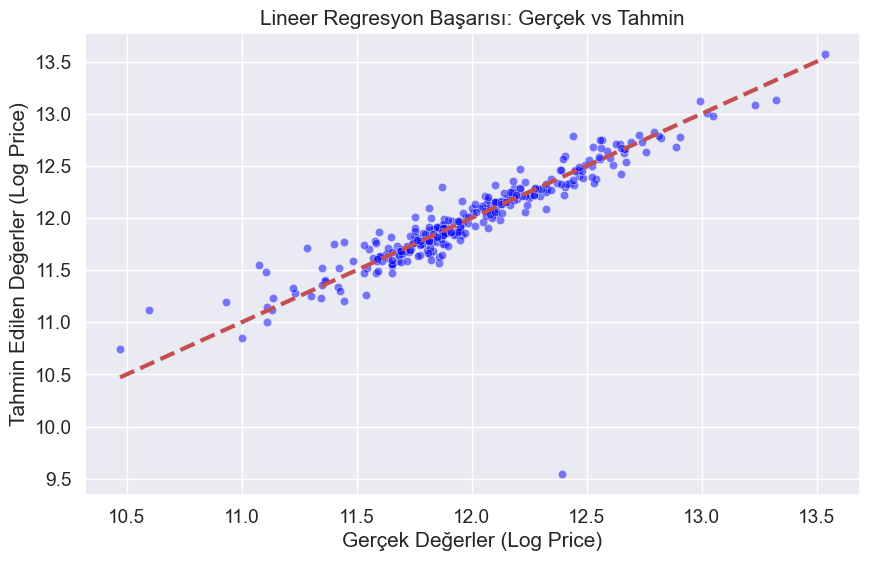

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5) #alpha saydamlık

# Mükemmel tahmin doğrusunu çizelim (Kırmızı çizgi)
# Eğer tahminlerimiz bu çizginin üzerindeyse, nokta atışı yapmışız demektir.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel('Gerçek Değerler (Log Price)')
plt.ylabel('Tahmin Edilen Değerler (Log Price)')
plt.title('Lineer Regresyon Başarısı: Gerçek vs Tahmin')
plt.show()

In [18]:
#limizde çok fazla değişken (sütun) var ama satır sayımız az.
#Standart Lineer Regresyon (OLS), eğitim setindeki her küçük detayı ezberlemeye çalıştı (Overfitting).
#Ridge (L2): "Katsayıları ($\beta$) küçült ama sıfırlama." (Bütün değişkenleri tutar ama etkilerini törpüler).
#Lasso (L1): "Gereksiz değişkenlerin katsayısını direkt 0 yap." (Otomatik değişken seçimi yapar).

In [28]:
from sklearn.linear_model import Ridge, Lasso

# 1. RIDGE REGRESYON (L2) 
# alpha=10 dedik. Bu değer modelin ne kadar "cezalandırılacağını" belirler.
# (Alpha çok büyükse katsayılar çok küçülür, model çok basitleşir).
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)

# 2. LASSO REGRESYON (L1) 
# Lasso daha sert bir filtre olduğu için alpha'yı genelde daha küçük tutarız.
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)

# KARŞILAŞTIRMA
print("Standart Linear Regression R^2: 0.7723 (Eski Skor)")
print("Ridge Regression R^2:          ", ridge_r2)
print("Lasso Regression R^2:          ", lasso_r2)

Standart Linear Regression R^2: 0.7723 (Eski Skor)
Ridge Regression R^2:           0.8624366300387041
Lasso Regression R^2:           0.8444600182235129


In [20]:
# Lasso modelinin katsayılarını (coef_) alıp pandas Serisine çevirelim
lasso_coefs = pd.Series(lasso_model.coef_, index=X.columns)

# Katsayısı 0 olanları (yani modelin elediği değişkenleri) sayalım
elaman_sayisi = sum(lasso_coefs == 0)
toplam_degisken = len(X.columns)

print(f"Toplam Değişken Sayısı: {toplam_degisken}")
print(f"Lasso'nun 'Gereksiz' Deyip Sıfırladığı Sayı: {elaman_sayisi}")
print(f"Lasso'nun Kullandığı Değişken Sayısı: {toplam_degisken - elaman_sayisi}")

# Hangi değişkenler en önemliymiş? (Katsayısı en yüksek pozitif ve negatifler)
# Mutlak değerce en büyük 10 katsayıya bakalım
onemli_degiskenler = lasso_coefs[lasso_coefs != 0].sort_values(key=abs, ascending=False).head(10) #ascending=False büyükten küçüğe
#sıralar.

print("\n--- Lasso'ya Göre Fiyatı En Çok Etkileyen 10 Özellik ---")
print(onemli_degiskenler)

Toplam Değişken Sayısı: 229
Lasso'nun 'Gereksiz' Deyip Sıfırladığı Sayı: 60
Lasso'nun Kullandığı Değişken Sayısı: 169

--- Lasso'ya Göre Fiyatı En Çok Etkileyen 10 Özellik ---
RoofMatl_CompShg    0.207257
RoofMatl_Tar&Grv    0.147910
GrLivArea           0.111002
RoofMatl_WdShngl    0.099940
RoofMatl_WdShake    0.083241
OverallQual         0.068325
YearBuilt           0.052775
RoofMatl_Metal      0.049003
RoofMatl_Roll       0.048075
OverallCond         0.040131
dtype: float64


In [29]:
from sklearn.linear_model import RidgeCV, LassoCV

# 1. Denenecek Alpha değerleri listesi (Geniş bir aralık verelim)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 50, 75, 100]

# --- RIDGE CV ---
# cv=5: Veriyi 5'e bölerek test et.
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# --- LASSO CV ---
# Lasso için daha küçük alpha'lar da ekleyelim, çünkü çok hassastır.
alphas_lasso = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000) # max_iter artırdık ki yakınsasın
lasso_cv.fit(X_train, y_train)

# --- SONUÇLAR ---
print("Ridge İçin En İyi Alpha:", ridge_cv.alpha_)
print("Lasso İçin En İyi Alpha:", lasso_cv.alpha_)

print("-" * 30)

# En iyi modellerle test seti skoruna bakalım
print("Ridge CV Test R^2:", round(ridge_cv.score(X_test, y_test), 4))
print("Lasso CV Test R^2:", round(lasso_cv.score(X_test, y_test), 4))

Ridge İçin En İyi Alpha: 100.0
Lasso İçin En İyi Alpha: 0.005
------------------------------
Ridge CV Test R^2: 0.8946
Lasso CV Test R^2: 0.8941


Senin durumunda modelin Alpha=100 seçmesi şu demektir: "Veri setinde o kadar çok 'dikkat dağıtıcı koku' (gürültü/birbirine benzeyen veri) var ki, benim tasmamı çok sıkı tutman gerekiyor. Aksi takdirde yoldan çıkarım."
Maliyet = Hata + (Alpha x katsayı)

Alpha , makine öğrenmesi modellerinde (Ridge, Lasso gibi) **"Modelin Karmaşıklığını Kontrol Eden Ayar Düğmesi"**dir.

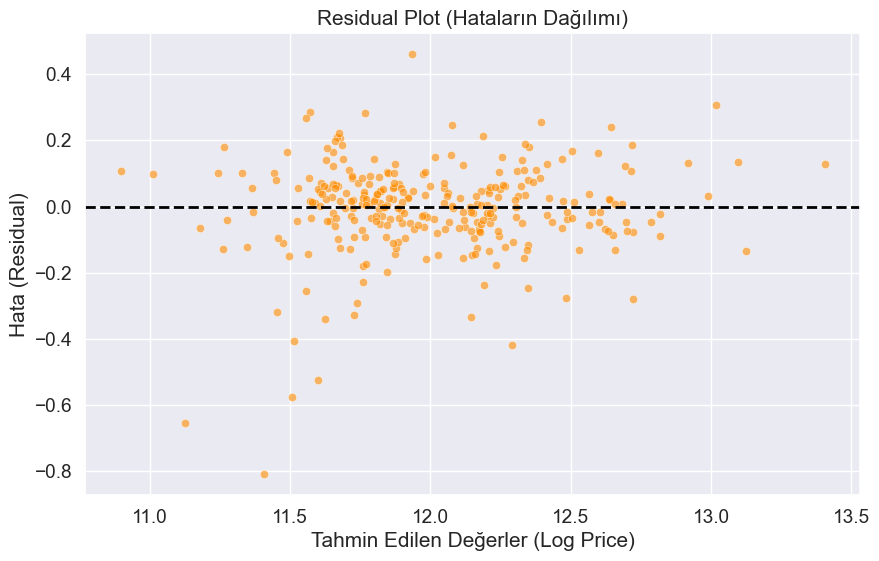

In [22]:
# En iyi Ridge modelini kullanarak tahminleri alalım
y_pred_final = ridge_cv.predict(X_test)

# Hataları (Residuals) hesaplayalım: Gerçek - Tahmin
residuals = y_test - y_pred_final

# Grafik çizelim
plt.figure(figsize=(10, 6))

# Hataların dağılımı
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.6, color='darkorange')

# 0 noktasına bir çizgi çekelim (İdeal durum bu çizgide olmalarıdır)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

plt.title('Residual Plot (Hataların Dağılımı)')
plt.xlabel('Tahmin Edilen Değerler (Log Price)')
plt.ylabel('Hata (Residual)')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Modeli Kuruyoruz
# n_estimators=100: 100 tane ağaçtan oluşan bir orman kur.
# random_state=42: Bilimsel tekrarlanabilirlik için sabitliyoruz.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Modeli Eğitiyoruz 
rf_model.fit(X_train, y_train)

# 3. Tahmin Yapıyoruz
rf_pred = rf_model.predict(X_test)

# 4. Skoru Hesaplıyoruz
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Ridge Model R^2 (Referans):", 0.8946)
print("-" * 30)
print("Random Forest R^2 Skoru:     ", round(rf_r2, 4))
print("Random Forest RMSE:          ", round(rf_rmse, 4))

Ridge Model R^2 (Referans): 0.8946
------------------------------
Random Forest R^2 Skoru:      0.8843
Random Forest RMSE:           0.147


In [24]:
!pip install xgboost

In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Modeli Kuruyoruz 
# early_stopping_rounds parametresini artık buraya, modelin içine yazıyoruz.
xgb_model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    n_jobs=-1, 
    random_state=42,
    early_stopping_rounds=50 # <-- Yer değişikliği burada yapıldı
)

# 2. Modeli Eğitiyoruz
# eval_set: Modelin gelişimini test setinden takip etmesi için gerekli.
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              verbose=False)

# 3. Tahmin
xgb_pred = xgb_model.predict(X_test)

# 4. Skor
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("Ridge Model R^2 (Eski Lider):", 0.8946)
print("-" * 30)
print("XGBoost R^2 Skoru:            ", round(xgb_r2, 4))
print("XGBoost RMSE:                 ", round(xgb_rmse, 4))

Ridge Model R^2 (Eski Lider): 0.8946
------------------------------
XGBoost R^2 Skoru:             0.8896
XGBoost RMSE:                  0.1435


In [32]:
# Modellerin tahminlerini ağırlıklı olarak birleştiriyoruz
# Ridge daha iyi skor aldığı için ona 0.60 ağırlık verelim
final_pred = (0.60 * ridge_pred) + (0.40 * xgb_pred)

# Karışımın skoruna bakalım
blended_r2 = r2_score(y_test, final_pred)
blended_rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print("Ridge (Tek Başına):", 0.8946)
print("XGBoost (Tek Başına):", 0.8896)
print("-" * 30)
print("Karma Model (Blended) R^2:", round(blended_r2, 4))
print("Karma Model RMSE:", round(blended_rmse, 4))

Ridge (Tek Başına): 0.8946
XGBoost (Tek Başına): 0.8896
------------------------------
Karma Model (Blended) R^2: 0.8913
Karma Model RMSE: 0.1424


In [33]:
# 1. Kazanan modelimiz (Ridge) ile logaritmik tahminleri alalım
final_log_pred = ridge_cv.predict(X_test)

# 2. Logaritmayı geri al (Inverse Transformation) -> Gerçek Dolar
# np.expm1 fonksiyonu log1p'nin tersidir.
y_pred_dollar = np.expm1(final_log_pred)
y_test_dollar = np.expm1(y_test)

# 3. Yan yana görelim: Gerçek Fiyat vs Tahmin
# Pandas tablosu oluşturalım
sonuc_tablosu = pd.DataFrame({
    'Gerçek Fiyat ($)': y_test_dollar,
    'Tahmin ($)': y_pred_dollar,
    'Hata ($)': y_test_dollar - y_pred_dollar,
    'Hata Oranı (%)': abs(y_test_dollar - y_pred_dollar) / y_test_dollar * 100
})

# 4. Rastgele 10 eve bakalım
print(sonuc_tablosu.sample(10))

print("-" * 30)
print("Ortalama Sapma (MAE): $", round(abs(sonuc_tablosu['Hata ($)']).mean(), 0))

      Gerçek Fiyat ($)     Tahmin ($)      Hata ($)  Hata Oranı (%)
711           102776.0  106472.177805  -3696.177805        3.596343
567           214000.0  220620.015793  -6620.015793        3.093465
846           213000.0  207270.440758   5729.559242        2.689934
1317          208900.0  200386.345864   8513.654136        4.075469
261           276000.0  314408.161191 -38408.161191       13.916000
428           195400.0  199108.034772  -3708.034772        1.897664
1108          181000.0  171115.796718   9884.203282        5.460886
811           144500.0  167263.137436 -22763.137436       15.753036
1293          162900.0  188502.770835 -25602.770835       15.716864
670           173500.0  184422.794988 -10922.794988        6.295559
------------------------------
Ortalama Sapma (MAE): $ 16392.0
